![example](images/director_shot.jpeg)

# Project Title

**Authors:** Abdulrahman Mawar
***

## Overview
This project looks into the types of genres that has the higest domestic gross value that have been released by merging 2 provided datas to help Microsoft with their decision on what movies to produce.

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_title=pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
df_bom=pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')

# Data Understanding
The .csv file above contains 2 data sets; 1st is from imdb which contains movies and their genres, and 2nd is from box office mojo which has the domectic_gross for some listed movies. The desired variable outcome is to show the client, Microsoft which genres of movies are currently on trend and which genres of movies generate more currency locally.

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [3]:
# 1st Data
df_title

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [4]:
# Selecting the desired columns only with a new variable
df_title_subset = df_title[['tconst', 'primary_title', 'start_year', 'genres']]
df_title_subset

,tconst,primary_title,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"
...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,2019,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary
146141,tt9916706,Dankyavar Danka,2013,Comedy
146142,tt9916730,6 Gunn,2017,NaN


In [5]:
# Checking for any NaN in the columns
df_title_subset.isna().sum()

tconst              0
primary_title       0
start_year          0
genres           5408
dtype: int64

In [6]:
# There are 5408 out of 146144 lines with no genres and this will be removed
df_title_subset_clean = df_title_subset.dropna()
df_title_subset_clean

,tconst,primary_title,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"
...,...,...,...,...
146138,tt9916428,The Secret of China,2019,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,2019,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary
146141,tt9916706,Dankyavar Danka,2013,Comedy


In [7]:
# Re-check for NaN
df_title_subset_clean.isna().sum()

tconst           0
primary_title    0
start_year       0
genres           0
dtype: int64

In [8]:
# Genres have multiple sub genres in some columns, separate them and give it a new variable
df_genres = df_title_subset_clean['genres'].str.split(',', expand=True)
df_genres

,0,1,2
0,Action,Crime,Drama
1,Biography,Drama,None
2,Drama,None,None
3,Comedy,Drama,None
4,Comedy,Drama,Fantasy
...,...,...,...
146138,Adventure,History,War
146139,Drama,None,None
146140,Documentary,None,None
146141,Comedy,None,None


In [9]:
# Adding df_genres first str back into our dataset
df_title_subset_clean['first_genres'] = df_genres[0]
df_title_subset_clean['second_genres'] = df_genres[1]
df_title_subset_clean['third_genres'] = df_genres[2]

C:\Users\User\AppData\Local\Temp/ipykernel_79984/1935463122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_title_subset_clean['first_genres'] = df_genres[0]
C:\Users\User\AppData\Local\Temp/ipykernel_79984/1935463122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_title_subset_clean['second_genres'] = df_genres[1]
C:\Users\User\AppData\Local\Temp/ipykernel_79984/1935463122.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [10]:
df_title_subset_clean

,tconst,primary_title,start_year,genres,first_genres,second_genres,third_genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",Action,Crime,Drama
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",Biography,Drama,None
2,tt0069049,The Other Side of the Wind,2018,Drama,Drama,None,None
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",Comedy,Drama,None
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",Comedy,Drama,Fantasy
...,...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,2019,"Adventure,History,War",Adventure,History,War
146139,tt9916538,Kuambil Lagi Hatiku,2019,Drama,Drama,None,None
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary,Documentary,None,None
146141,tt9916706,Dankyavar Danka,2013,Comedy,Comedy,None,None


In [11]:
df_title_subset_clean.first_genres.value_counts()

Documentary    41609
Drama          31343
Comedy         21514
Action         10335
Biography       8021
Horror          6650
Adventure       4760
Crime           3919
Thriller        3055
Animation       1839
Romance         1555
Family          1108
Fantasy          905
Mystery          866
Sci-Fi           851
Music            741
History          468
Musical          423
Sport            363
Western          142
War              132
Reality-TV        54
Talk-Show         39
Adult             23
News              17
Game-Show          3
Short              1
Name: first_genres, dtype: int64

In [12]:
genres_by_start_year = df_title_subset_clean.groupby(['start_year'])['first_genres'].sum()

In [13]:
# Load data with a graph to show top genres in a chronological order
# There is an outlier of 1 '2115' but it can be ignored as it's not significant
genres_by_start_year

start_year
2010    DramaHistoryDramaDramaAdventureDramaComedyCome...
2011    AnimationDramaDramaDramaActionComedyAdventureA...
2012    DocumentaryBiographyActionCrimeDocumentaryCome...
2013    ActionDocumentaryBiographyAdventureCrimeDocume...
2014    AdventureActionActionDramaDramaComedyActionCom...
2015    Sci-FiCrimeBiographyComedyActionBiographyDrama...
2016    ActionActionCrimeDramaDramaComedyAdventureBiog...
2017    ComedyHorrorAdventureAdventureHorrorDocumentar...
2018    DramaComedyComedyDocumentaryDramaDocumentaryAc...
2019    BiographyDramaDocumentaryCrimeActionBiographyA...
2020    ActionAdventureAdventureAdventureHorrorHistory...
2021    ActionActionActionActionComedyActionAdventureC...
2022    ActionActionDramaActionHorrorComedyActionComed...
2023                                ActionActionAdventure
2024                                            Adventure
2025                                               Action
2026                                              Fantasy
202

In [14]:
# 2nd data is using the bom.csv to check for domestic_gross per genres
df_bom_subset=df_bom[['title', 'domestic_gross',]]

In [15]:
# Removed NaN from domestic_gross
df_bom_subset_clean = df_bom_subset.dropna()

In [16]:
# Merge the title.csv and bom.csv to find the domestic_gross vs genres and assign it a new variable
df_title_bom = df_bom_subset_clean.merge(df_title_subset_clean, left_on='title', right_on='primary_title', how='left')

In [17]:
# There are a high number of movies in bom.csv with no genres recorded in title.csv so we can dropped it
# But we don't want to drop the second and third genres
# So we have to fill it with a value
# Then drop the 770 missing first_genres
df_title_bom.isna().sum()

title                0
domestic_gross       0
tconst             770
primary_title      770
start_year         770
genres             770
first_genres       770
second_genres     1590
third_genres      2477
dtype: int64

In [18]:
df_title_bom.second_genres = df_title_bom.second_genres.fillna('Not Applicable')
df_title_bom.third_genres = df_title_bom.third_genres.fillna('Not Applicable')
df_title_bom.isna().sum()

title               0
domestic_gross      0
tconst            770
primary_title     770
start_year        770
genres            770
first_genres      770
second_genres       0
third_genres        0
dtype: int64

In [19]:
df_title_bom

,title,domestic_gross,tconst,primary_title,start_year,genres,first_genres,second_genres,third_genres
0,Toy Story 3,415000000.0,tt0435761,Toy Story 3,2010.0,"Adventure,Animation,Comedy",Adventure,Animation,Comedy
1,Alice in Wonderland (2010),334200000.0,NaN,NaN,NaN,NaN,NaN,Not Applicable,Not Applicable
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,NaN,NaN,NaN,NaN,NaN,Not Applicable,Not Applicable
3,Inception,292600000.0,tt1375666,Inception,2010.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
4,Shrek Forever After,238700000.0,tt0892791,Shrek Forever After,2010.0,"Adventure,Animation,Comedy",Adventure,Animation,Comedy
...,...,...,...,...,...,...,...,...,...
4067,The Quake,6200.0,tt6523720,The Quake,2018.0,"Action,Drama,Thriller",Action,Drama,Thriller
4068,Edward II (2018 re-release),4800.0,NaN,NaN,NaN,NaN,NaN,Not Applicable,Not Applicable
4069,El Pacto,2500.0,NaN,NaN,NaN,NaN,NaN,Not Applicable,Not Applicable
4070,The Swan,2400.0,NaN,NaN,NaN,NaN,NaN,Not Applicable,Not Applicable


In [20]:
df_title_bom_clean = df_title_bom.dropna().reset_index()

In [21]:
df_title_bom_clean.first_genres.value_counts()

Drama          861
Action         658
Comedy         649
Biography      272
Documentary    236
Adventure      218
Crime          145
Horror         124
Animation       41
Thriller        38
Fantasy         17
Romance         13
Mystery         12
Family           8
Sci-Fi           5
Music            2
History          1
Sport            1
Western          1
Name: first_genres, dtype: int64

In [22]:
top_5_genres = df_title_bom_clean.groupby(['first_genres'])['domestic_gross'].sum().nlargest(5)

In [23]:
top_5_genres

first_genres
Action       3.843915e+10
Adventure    1.561104e+10
Comedy       1.296519e+10
Drama        1.117403e+10
Biography    5.506764e+09
Name: domestic_gross, dtype: float64

Text(0, 0.5, 'domestic_gross')

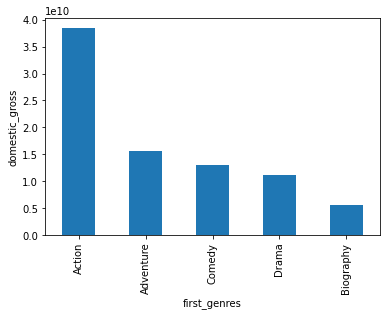

In [34]:
top_5_genres.plot.bar()

plt.ylabel('domestic_gross')

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

# Data Modeling


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***